In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train      = pd.read_csv("/content/drive/MyDrive/gh/dacon_newstopic/DATA/train_data.csv")
test       = pd.read_csv("/content/drive/MyDrive/gh/dacon_newstopic/DATA/test_data.csv")
submission = pd.read_csv("/content/drive/MyDrive/gh/dacon_newstopic/DATA/sample_submission.csv")
topic_dict = pd.read_csv("/content/drive/MyDrive/gh/dacon_newstopic/DATA/topic_dict.csv")


In [7]:
DATA_IN_PATH = '/content/drive/MyDrive/gh/dacon_newstopic/DATA/'
print("파일 크기: ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기: 
sample_submission.csv         0.08MB
test_data.csv                 0.68MB
topic_dict.csv                0.0MB
train_data.csv                3.5MB


In [9]:
train_data = pd.read_csv(DATA_IN_PATH + 'train_data.csv')
train_data.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [10]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 45654


In [11]:
train_length = train_data['title'].astype(str).apply(len)
train_length.head()

0    24
1    30
2    30
3    32
4    25
Name: title, dtype: int64

Text(0, 0.5, 'Number of title')

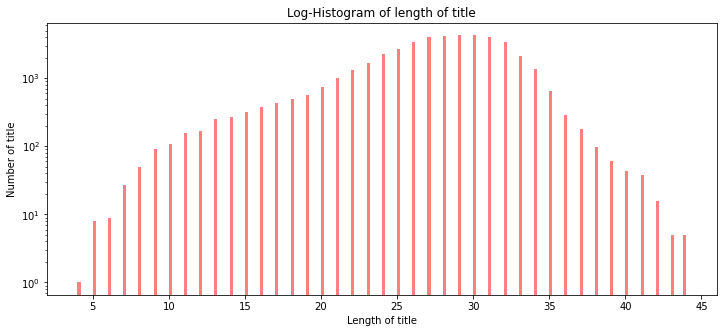

In [12]:
plt.figure(figsize=(12, 5))
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of title')
plt.xlabel('Length of title')
plt.ylabel('Number of title')

In [13]:
print('Title 길이 최대 값: {}'.format(np.max(train_length)))
print('Title 길이 최소 값: {}'.format(np.min(train_length)))
print('Title 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('Title 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('Title 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('Title 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('Title 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

Title 길이 최대 값: 44
Title 길이 최소 값: 4
Title 길이 평균 값: 27.33
Title 길이 표준편차: 4.97
Title 길이 중간 값: 28.0
Title 길이 제 1 사분위: 25.0
Title 길이 제 3 사분위: 31.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f9fa5662910>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9fa54229d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9fa5459bd0>],
 'means': [<matplotlib.lines.Line2D at 0x7f9fa55e7d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9fa561dc10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9fa55cbb90>,
  <matplotlib.lines.Line2D at 0x7f9fa56101d0>]}

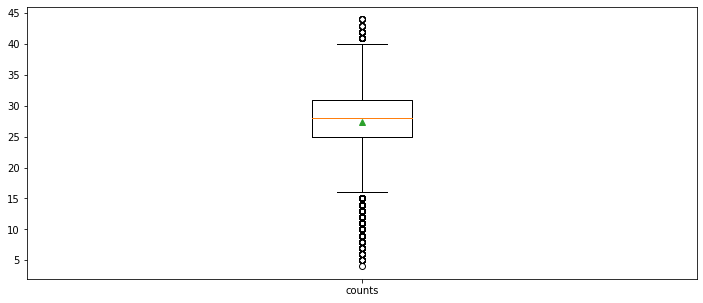

In [14]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


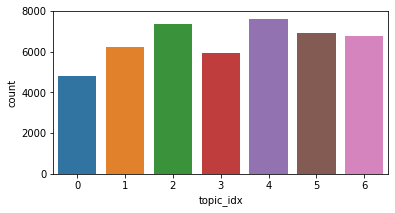

In [15]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['topic_idx'])

In [16]:
train_word_counts = train_data['title'].astype(str).apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of title')

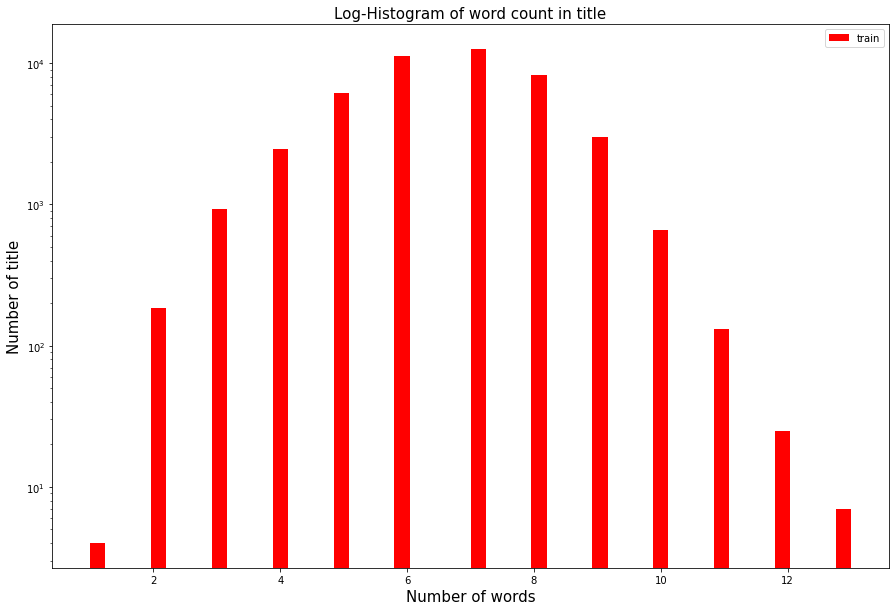

In [17]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in title', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of title', fontsize=15)

In [18]:
print('Title 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('Title 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('Title 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('Title 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('Title 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('Title 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('Title 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

Title 단어 개수 최대 값: 13
Title 단어 개수 최소 값: 1
Title 단어 개수 평균 값: 6.59
Title 단어 개수 표준편차: 1.47
Title 단어 개수 중간 값: 7.0
Title 단어 개수 제 1 사분위: 6.0
Title 단어 개수 제 3 사분위: 8.0
